# Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import timeit
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

plt.style.use('ggplot')

In [13]:
df = pd.read_csv('datasets/training-datasets/ucl_results.csv', index_col=0)
df_res_clean = pd.read_csv('datasets/training-datasets/results-clean.csv', index_col=0)
df_res_raw = pd.read_csv('datasets/training-datasets/results-raw.csv', index_col=0)

In [14]:
df.head()

text  label  raw_sent  \
0  #ChampionsLeague Does yellow card for dissent ...      0         0   
1  #Leicester 1-1 #AtleticoMadrid: Solid Spaniard...      2         2   
2         #UEFA has a serious refereeing problem. \n      0         0   
3  Group A #Basel 1 - 2 #PSG #LudogoretsRazgrad 2...      1         1   
4  Angus on the bench tonight for #ManCity vs #FC...      1         2   

   raw_sent_t                                       cleaned_text  clean_sent  \
0           0  championsleague does yellow card for dissent n...           0   
1           2  leicester 1-1 atleticomadrid: solid spaniards ...           2   
2           0            uefa has a serious refereeing problem.            0   
3           1  group a basel 1 - 2 psg ludogoretsrazgrad 2 - ...           1   
4           2  angus on the bench tonight for mancity vs fcba...           2   

   clean_sent_t  
0             0  
1             2  
2             0  
3             1  
4             2

# Results

In [22]:
df_results = pd.DataFrame([])
df_results['label'] = df['label']

In [27]:
df_results.head()

label  3_raw_no_t
0      0           0
1      2           2
2      0           0
3      1           1
4      1           2

## 3-Class

### Raw w/threshold

In [30]:
def sent(example):
    
    result = max([(x,y) for x,y in example.to_dict().items()], key=lambda x: x[1])[0]

    if result == 'roberta_neg_clean':
        sentiment_res = 0
    elif result == 'roberta_neu_clean':
        sentiment_res = 1
    else:
        sentiment_res = 2

    
    print(example.to_dict(), 'sentiment: ', sentiment_res)
    
    return sentiment_res

In [31]:
df_results['3_clean_no_t'] = df_res_clean.apply(lambda row: sent(row), axis=1)

{'roberta_neg_clean': 0.823, 'roberta_neu_clean': 0.1634, 'roberta_pos_clean': 0.0136} sentiment:  0
{'roberta_neg_clean': 0.0194, 'roberta_neu_clean': 0.2808, 'roberta_pos_clean': 0.6998} sentiment:  2
{'roberta_neg_clean': 0.8943, 'roberta_neu_clean': 0.0985, 'roberta_pos_clean': 0.0072} sentiment:  0
{'roberta_neg_clean': 0.0902, 'roberta_neu_clean': 0.8595, 'roberta_pos_clean': 0.0503} sentiment:  1
{'roberta_neg_clean': 0.0162, 'roberta_neu_clean': 0.1616, 'roberta_pos_clean': 0.8222} sentiment:  2
{'roberta_neg_clean': 0.2678, 'roberta_neu_clean': 0.6624, 'roberta_pos_clean': 0.0698} sentiment:  1
{'roberta_neg_clean': 0.0472, 'roberta_neu_clean': 0.8702, 'roberta_pos_clean': 0.0826} sentiment:  1
{'roberta_neg_clean': 0.0024, 'roberta_neu_clean': 0.0134, 'roberta_pos_clean': 0.9842} sentiment:  2
{'roberta_neg_clean': 0.0238, 'roberta_neu_clean': 0.9352, 'roberta_pos_clean': 0.0409} sentiment:  1
{'roberta_neg_clean': 0.0194, 'roberta_neu_clean': 0.4971, 'roberta_pos_clean': 0.4

In [61]:
def threshold(example):

    result = example.to_dict()

    elements = [x for x in example.to_dict().items()]
    if elements[0][1] < elements[2][1]:
        if elements[2][1] >= round(elements[1][1] - 0.3, 4):
            sentiment_res = 2
        else:
            sentiment_res = 1
    else:
        if elements[0][1] >= round(elements[1][1] - 0.2, 4):
            sentiment_res = 0
        else:
            sentiment_res = 1
    
    
    print(result, 'sentiment: ', sentiment_res)
    
    return sentiment_res

In [66]:
df_results['3_clean_t-0.3-0.2'] = df_res_clean.apply(lambda row: threshold(row), axis=1)

{'roberta_neg_clean': 0.823, 'roberta_neu_clean': 0.1634, 'roberta_pos_clean': 0.0136} sentiment:  0
{'roberta_neg_clean': 0.0194, 'roberta_neu_clean': 0.2808, 'roberta_pos_clean': 0.6998} sentiment:  2
{'roberta_neg_clean': 0.8943, 'roberta_neu_clean': 0.0985, 'roberta_pos_clean': 0.0072} sentiment:  0
{'roberta_neg_clean': 0.0902, 'roberta_neu_clean': 0.8595, 'roberta_pos_clean': 0.0503} sentiment:  1
{'roberta_neg_clean': 0.0162, 'roberta_neu_clean': 0.1616, 'roberta_pos_clean': 0.8222} sentiment:  2
{'roberta_neg_clean': 0.2678, 'roberta_neu_clean': 0.6624, 'roberta_pos_clean': 0.0698} sentiment:  1
{'roberta_neg_clean': 0.0472, 'roberta_neu_clean': 0.8702, 'roberta_pos_clean': 0.0826} sentiment:  1
{'roberta_neg_clean': 0.0024, 'roberta_neu_clean': 0.0134, 'roberta_pos_clean': 0.9842} sentiment:  2
{'roberta_neg_clean': 0.0238, 'roberta_neu_clean': 0.9352, 'roberta_pos_clean': 0.0409} sentiment:  1
{'roberta_neg_clean': 0.0194, 'roberta_neu_clean': 0.4971, 'roberta_pos_clean': 0.4

### Classification results

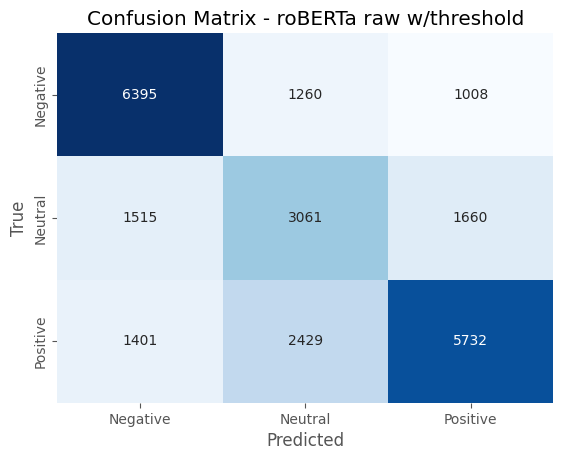

In [67]:
y_true = df_results['label']
y_pred = df_results['3_clean_t-0.3-0.2']

conf_matrix = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - roBERTa raw w/threshold')
plt.show()

In [68]:
report = classification_report(y_true, y_pred)
print("Classification Report - roBERTa clean w/threshold:")
print(report)

# Compute accuracy score
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy}")

Classification Report - roBERTa clean w/threshold:
              precision    recall  f1-score   support

           0       0.69      0.74      0.71      8663
           1       0.45      0.49      0.47      6236
           2       0.68      0.60      0.64      9562

    accuracy                           0.62     24461
   macro avg       0.61      0.61      0.61     24461
weighted avg       0.63      0.62      0.62     24461

Accuracy: 0.6209067495196435


## 2-Class

In [80]:
df_res_bin = pd.read_csv('datasets/training-datasets/results-bin.csv', index_col=0)
df_res_bin.head()

roberta_neg_bin  roberta_neu_bin  roberta_pos_bin  label
0           0.8163           0.1696           0.0141      0
1           0.0053           0.1343           0.8604      2
2           0.9041           0.0873           0.0086      0
3           0.0020           0.0164           0.9816      2
4           0.0184           0.4686           0.5130      0

### Raw w/threshold

In [81]:
def sent_bin(example):
    scores_dict = example.to_dict()

    sentiment_res = 0 if scores_dict['roberta_neg_bin'] > scores_dict['roberta_pos_bin'] else 2

    print(scores_dict, 'sentiment: ', sentiment_res)

    return int(sentiment_res)

In [82]:
df_res_bin['2_raw']= df_res_bin.apply(lambda row: sent_bin(row), axis=1)

{'roberta_neg_bin': 0.8163, 'roberta_neu_bin': 0.1696, 'roberta_pos_bin': 0.0141, 'label': 0.0} sentiment:  0
{'roberta_neg_bin': 0.0053, 'roberta_neu_bin': 0.1343, 'roberta_pos_bin': 0.8604, 'label': 2.0} sentiment:  2
{'roberta_neg_bin': 0.9041, 'roberta_neu_bin': 0.0873, 'roberta_pos_bin': 0.0086, 'label': 0.0} sentiment:  0
{'roberta_neg_bin': 0.002, 'roberta_neu_bin': 0.0164, 'roberta_pos_bin': 0.9816, 'label': 2.0} sentiment:  2
{'roberta_neg_bin': 0.0184, 'roberta_neu_bin': 0.4686, 'roberta_pos_bin': 0.513, 'label': 0.0} sentiment:  2
{'roberta_neg_bin': 0.0031, 'roberta_neu_bin': 0.2991, 'roberta_pos_bin': 0.6978, 'label': 2.0} sentiment:  2
{'roberta_neg_bin': 0.0015, 'roberta_neu_bin': 0.0095, 'roberta_pos_bin': 0.9891, 'label': 2.0} sentiment:  2
{'roberta_neg_bin': 0.1735, 'roberta_neu_bin': 0.491, 'roberta_pos_bin': 0.3355, 'label': 2.0} sentiment:  2
{'roberta_neg_bin': 0.6546, 'roberta_neu_bin': 0.3272, 'roberta_pos_bin': 0.0182, 'label': 0.0} sentiment:  0
{'roberta_neg

### Cleaned

### Classification results

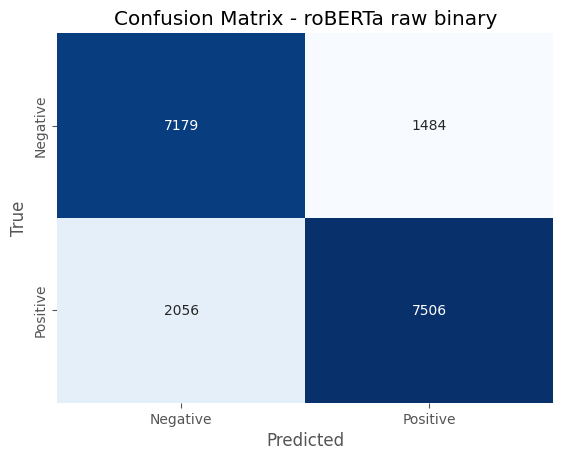

In [83]:
y_true = df_res_bin['label']
y_bin = df_res_bin['2_raw']

conf_matrix = confusion_matrix(y_true, y_bin)

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - roBERTa raw binary')
plt.show()

In [84]:
report = classification_report(y_true, y_bin)
print("Classification Report:")
print(report)

# Compute accuracy score
accuracy = accuracy_score(y_true, y_bin)
print(f"Accuracy: {accuracy}")

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.83      0.80      8663
           2       0.83      0.78      0.81      9562

    accuracy                           0.81     18225
   macro avg       0.81      0.81      0.81     18225
weighted avg       0.81      0.81      0.81     18225

Accuracy: 0.805761316872428
